# Aula 05 - Exercício 04

### Alunos:
 - Antonio Moreira - 9779242
 - 

## Perceptron e Data augmentation 
Neste exercicio utilizaremos o classificador Perceptron para classificar dois dígitos. No código abaixo os dois digitos são carregados e exibidos lado a lado.

Shape : (30, 30)


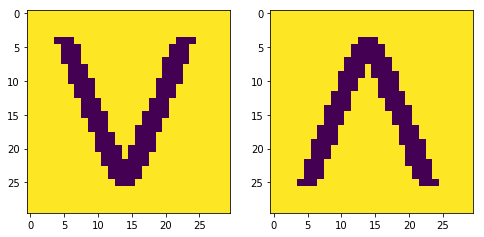

In [76]:
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np


# Lendo as duas imagens originais
V = imread("datasets/V.png", as_gray=True)
V_inv = imread("datasets/inv_V.png", as_gray=True)

print("Shape :", np.shape(V))

# Figura vai ter 1 linha e 2 colunas
rows = 1
columns = 2
fig = plt.figure(figsize=(8, 8))

# Exibindo primeira imagem
fig.add_subplot(rows, columns, 1)
plt.grid(False)
plt.imshow(V)

# Exibindo segunda imagem
fig.add_subplot(rows, columns, 2)
plt.grid(False)
plt.imshow(V_inv)
plt.show()



---

- Dado o código acima, aplique ruído (random_nosie) no primeiro símbolo e rotacione (transform.rotate) em 25º o segundo símbolo antes de exibi-los.
  - Dica: Para o `random_noise` utilize parametro `mode='pepper' ` e  para `transform.rotate` utilize `preserve_range=True, mode='constant', cval=1`

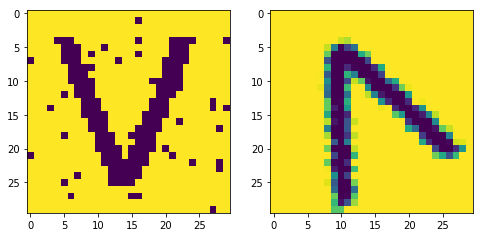

In [77]:
from skimage.util import random_noise
from skimage import transform

V = random_noise(V, mode='pepper')
V_inv = transform.rotate(V_inv, 25, preserve_range=True, mode='constant', cval=1)

# Figura vai ter 1 linha e 2 colunas
rows = 1
columns = 2
fig = plt.figure(figsize=(8, 8))

# Exibindo primeira imagem
fig.add_subplot(rows, columns, 1)
plt.grid(False)
plt.imshow(V)

# Exibindo segunda imagem
fig.add_subplot(rows, columns, 2)
plt.grid(False)
plt.imshow(V_inv)
plt.show()



---

- Agora defina a função `gen_data` abaixo. A função recebe como parâmetros: uma imagem base (v ou v invertido), a quantidade de dados artificiais a serem gerados, a classe da imagem base passada e uma lista de dados e labels. A função deve concatenar (`append`) as imagens geradas na lista `data` e suas respectivas classes na lista `target`.

  - Dica: Utilize a função `random.uniform(-a, a)` para gerar valores aleatórios entre -a e a para criar angulos de rotação variados.
  - Dica: Utilize valores diferentes para o parâmetro `seed` do random_noise para produzir resultados diferentes

In [78]:
import random
random.seed()


def gen_data(base_image, quantity, label, data, target):
    #Defina a função aqui
    
    for i in range(quantity):
        base_image = random_noise(base_image, mode='pepper', seed=i)
        base_image = transform.rotate(base_image, random.uniform(-25,25), preserve_range=True, mode='constant', cval=1)    
        data.append(base_image)
        target.append(label)



---


- Edite a linha abaixo do comentário para exibir uma imagem 4x4 do dataset criado acima.

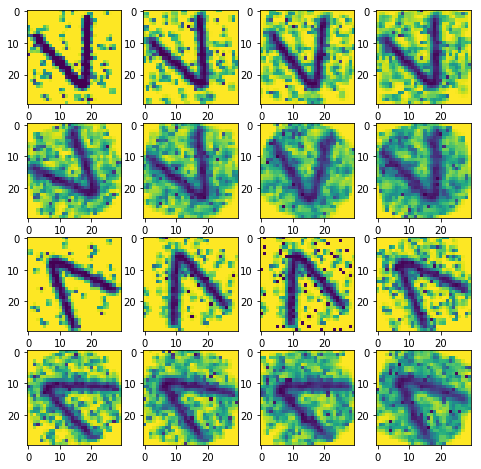

In [35]:
import numpy as np

x = []
y = []

gen_data(V, 8 , 0, x, y)
gen_data(V_inv, 8, 1, x, y)
x = np.asarray(x)
y = np.asarray(y)

############################

# Figura vai ter 1 linha e 2 colunas
rows = 4
columns = 4
fig = plt.figure(figsize=(8, 8))

for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    plt.grid(False)
    plt.imshow(x[i])

plt.show()



---

- Separe o dataset criado em 12 imagens de treinamento e 4 imagens de teste utilizando a função `train_test_split`. Depois treine um classificador do tipo Perceptron no conjunto de treino. Calcule a acurácia para os conjuntos de treino e teste.

  - Dica: Você deve transformar as dimensões do conjunto de entrada para utilizar o Perceptron. Uma observação do conjunto é uma matriz 30x30. Para aplicar essa matriz no perceptron, você deve transformá-la em um vetor com 30x30 =900 elementos. Para isso utilize a função reshape da biblioteca numpy para transformar o conjunto x por inteiro.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=4, random_state=42)
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))


x_train = np.reshape(x_train, (12, 900))
x_test = np.reshape(x_test, (4,900))

clf = Perceptron(tol=1e-3, random_state=0).fit(x_train,y_train)

print("Score train data:\t", clf.score(x_train, y_train))
print("Score test data:\t", clf.score(x_test, y_test))

y_pred = clf.predict(x_test)

print("Accuracy: {}%".format(accuracy_score(y_test, y_pred)*100))

(12, 30, 30)
(4, 30, 30)
(12,)
(4,)
Score train data:	 1.0
Score test data:	 1.0
Accuracy: 100.0%




---

Devido à natureza da função threshold, podemos ter uma falsa sensação de quê nosso classificador classifica os exemplos com a mesma confiança. Porém, isso não é verdadeiro. No caso do perceptron utilizado, podemos ter uma medida da confiança do classificador para um dado exemplo calculando a distância relativa desse exemplo para o hiperplano separador. Essa medida pode ser obtida através da função `decision_function(X)`

- Utilize a função  `decision_function(X)` para calcular a distância dos exemplos query0.png ~ query4.png ao hiperplano separador do classificador treinado no item anterior e analise a relação entre distância x confiança x qualidade do símbolo na imagem.

In [83]:
#renomeei a query4 → query3

samples=[]

for i in range(4):
    img = imread("datasets/query{}.png".format(i), as_gray=True)
    img = np.reshape(img, 900)
    #print(img)
    samples.append(img)
    
samples = np.asarray(vec)

print(clf.decision_function(vec))

[15.00010754 22.08947434  5.51285424  8.12252487]


Quanto maior a distância do hiperplano separador, mais o classificador "_tem certeza_" que está tomando a decisão certa.